Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


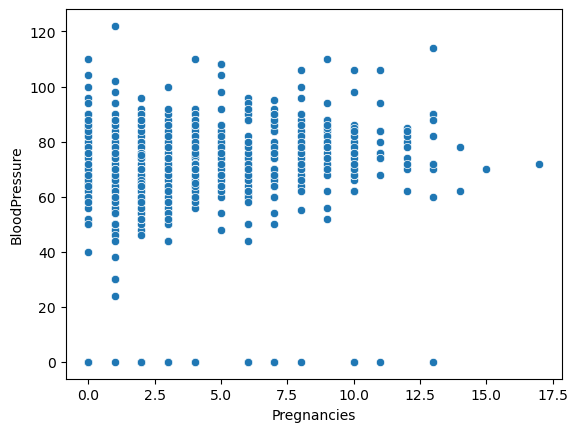

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='Pregnancies', y='BloodPressure', data=df)
plt.xlabel('Pregnancies')
plt.ylabel('BloodPressure')
plt.show()

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [13]:
df= df.fillna(df.mean())

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [76]:
from scipy import stats
z_scores = stats.zscore(df.select_dtypes(include='number'))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]
df = pd.get_dummies(df, columns=['Outcome'])

KeyError: "None of [Index(['Outcome'], dtype='object')] are in the [columns]"

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome_0,Outcome_1,Age_21,...,Age_54,Age_55,Age_56,Age_57,Age_58,Age_59,Age_60,Age_61,Age_62,Age_63


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [35]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [36]:
train_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_0,Outcome_1
197,3,107,62,13,48,22.9,0.678,23,0,1
295,6,151,62,31,120,35.5,0.692,28,1,0
393,4,116,72,12,87,22.1,0.463,37,1,0
550,1,116,70,28,0,27.4,0.204,21,1,0
454,2,100,54,28,105,37.8,0.498,24,1,0
...,...,...,...,...,...,...,...,...,...,...
79,2,112,66,22,0,25.0,0.307,24,1,0
116,5,124,74,0,0,34.0,0.220,38,0,1
302,5,77,82,41,42,35.8,0.156,35,1,0
484,0,145,0,0,0,44.2,0.630,31,0,1


In [37]:
test_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_0,Outcome_1
319,6,194,78,0,0,23.5,0.129,59,0,1
732,2,174,88,37,120,44.5,0.646,24,0,1
287,1,119,86,39,220,45.6,0.808,29,0,1
374,2,122,52,43,158,36.2,0.816,28,1,0
352,3,61,82,28,0,34.4,0.243,46,1,0
...,...,...,...,...,...,...,...,...,...,...
718,1,108,60,46,178,35.5,0.415,24,1,0
74,1,79,75,30,0,32.0,0.396,22,1,0
15,7,100,0,0,0,30.0,0.484,32,0,1
755,1,128,88,39,110,36.5,1.057,37,0,1


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [40]:
clf = DecisionTreeClassifier()
clf.fit(train_data.drop(columns=['Outcome_1']), train_data['Outcome_1'])

DecisionTreeClassifier()

In [54]:
scores = cross_val_score(clf, train_data.drop(columns=['Outcome_1']), train_data['Outcome_1'], cv=4)

In [55]:
scores

array([1., 1., 1., 1.])

In [56]:
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
std_score = scores.std()
print("Mean Cross-Validation Score:", mean_score)
print("Standard Deviation of Cross-Validation Scores:", std_score)

Cross-Validation Scores: [1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0
Standard Deviation of Cross-Validation Scores: 0.0


In [57]:
predictions = clf.predict(test_data.drop(columns=['Outcome_1']))
accuracy = clf.score(test_data.drop(columns=['Outcome_1']), test_data['Outcome_1'])
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 1.0


Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
predictions = clf.predict(test_data.drop(columns=['Outcome_1']))

In [61]:
predictions

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=uint8)

In [62]:
accuracy = accuracy_score(test_data['Outcome_1'], predictions)
precision = precision_score(test_data['Outcome_1'], predictions)
recall = recall_score(test_data['Outcome_1'], predictions)
f1 = f1_score(test_data['Outcome_1'], predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


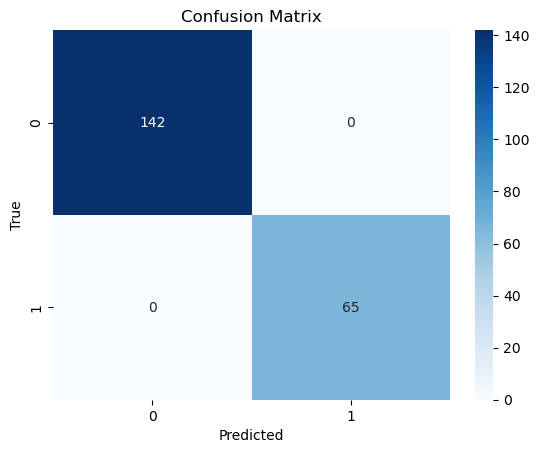

In [65]:
cm = confusion_matrix(test_data['Outcome_1'], predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

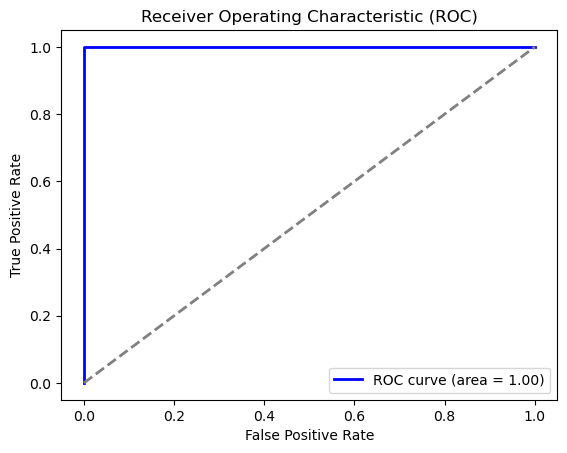

In [67]:
fpr, tpr, _ = roc_curve(test_data['Outcome_1'], predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

In [70]:
feature_importances = clf.feature_importances_
feature_names = train_data.drop(columns=['Outcome_1']).columns
variable_importance = dict(zip(feature_names, feature_importances))
sorted_variable_importance = sorted(variable_importance.items(), key=lambda x: x[1], reverse=True)
for variable, importance in sorted_variable_importance:
    print(f"{variable}: {importance}")

Outcome_0: 1.0
Pregnancies: 0.0
Glucose: 0.0
BloodPressure: 0.0
SkinThickness: 0.0
Insulin: 0.0
BMI: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0


Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [74]:
new_data_predictions = clf.predict(new_data.drop(columns=['Outcome_1']))
accuracy = accuracy_score(new_data['Outcome_1'], new_data_predictions)
precision = precision_score(new_data['Outcome_1'], new_data_predictions)
recall = recall_score(new_data['Outcome_1'], new_data_predictions)
f1 = f1_score(new_data['Outcome_1'], new_data_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

NameError: name 'new_data' is not defined